In [52]:
#import all required library
import numpy as np # linear algebra
import pandas as pd # data processing 
import warnings
warnings.filterwarnings('ignore')
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 



In [2]:
#read data
data = pd.read_csv('D:\mcdonalds.csv')

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [6]:
data.shape

(1453, 15)

In [6]:
# Now check dublicate entries.
data.duplicated().sum()


22

<Axes: >

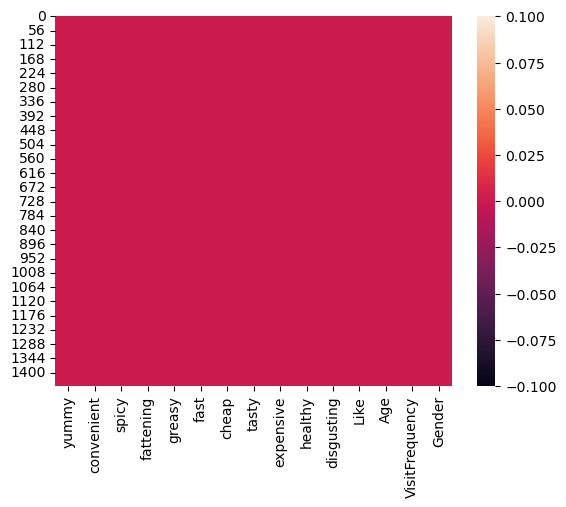

In [7]:
sns.heatmap(data.isnull())

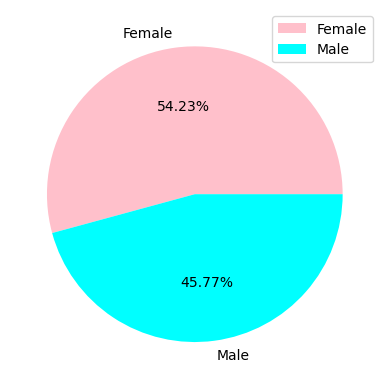

In [11]:
Gender = ["Female", "Male"]
Color = ["pink", "cyan"]
Size = data["Gender"].value_counts()
plt.pie(Size, labels=Gender, colors=Color, autopct="%.2f%%")
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='count'>

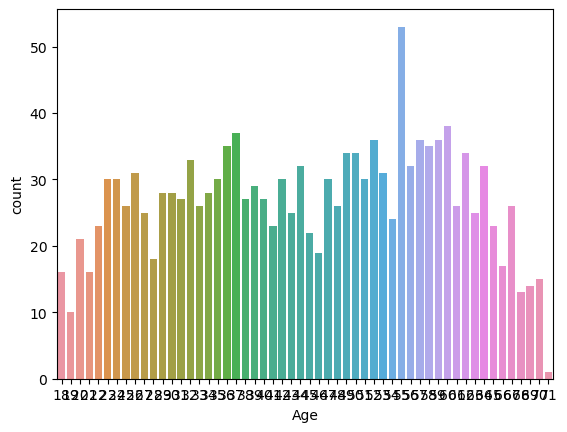

In [12]:
sns.countplot(data,x='Age')

In [14]:
data["Like"]=data["Like"].replace({'I hate it!-5': '-5', 'I love it!+5':'+5'})
data.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

here we can see our data type is objective we need to encode the data before going for futher steps of analysis.

In [15]:
from sklearn.preprocessing import LabelEncoder
def label_encoded(x):
    le = LabelEncoder()
    le.fit(x)
    print(x.name, le.classes_)
    return le.transform(x)

Here we used made the funtion for encoding out data. We used LabelEncoder for this.

In [16]:
for col in data.columns:
    data[str(col)] = label_encoded(data[str(col)])

yummy ['No' 'Yes']
convenient ['No' 'Yes']
spicy ['No' 'Yes']
fattening ['No' 'Yes']
greasy ['No' 'Yes']
fast ['No' 'Yes']
cheap ['No' 'Yes']
tasty ['No' 'Yes']
expensive ['No' 'Yes']
healthy ['No' 'Yes']
disgusting ['No' 'Yes']
Like ['+1' '+2' '+3' '+4' '+5' '-1' '-2' '-3' '-4' '-5' '0']
Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71]
VisitFrequency ['Every three months' 'More than once a week' 'Never' 'Once a month'
 'Once a week' 'Once a year']
Gender ['Female' 'Male']


In [17]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,7,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1


In [18]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [19]:
data.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,4.458362,26.604955,2.637990,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,3.407245,14.221178,1.756057,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,15.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,27.000000,3.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,39.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,53.000000,5.000000,1.000000


In [20]:
data.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852,-0.484431,-0.281653,-0.023896,-0.062545
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797,-0.274855,-0.070597,-0.035920,-0.041402
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834,0.029596,0.146217,-0.017184,0.051015
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054,0.071720,-0.139254,0.005929,-0.059707
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879,0.165256,-0.233554,0.007803,0.021801
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993,-0.108901,-0.020558,0.011130,-0.049027
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602,-0.115335,0.016958,0.032753,-0.116050
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086,-0.473550,-0.194576,-0.023878,-0.044385
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748,0.108180,-0.070851,-0.009614,0.144113
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722,-0.168800,0.021366,-0.008230,-0.042455


array([[<Axes: title={'center': 'yummy'}>,
        <Axes: title={'center': 'convenient'}>,
        <Axes: title={'center': 'spicy'}>,
        <Axes: title={'center': 'fattening'}>],
       [<Axes: title={'center': 'greasy'}>,
        <Axes: title={'center': 'fast'}>,
        <Axes: title={'center': 'cheap'}>,
        <Axes: title={'center': 'tasty'}>],
       [<Axes: title={'center': 'expensive'}>,
        <Axes: title={'center': 'healthy'}>,
        <Axes: title={'center': 'disgusting'}>,
        <Axes: title={'center': 'Like'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'VisitFrequency'}>,
        <Axes: title={'center': 'Gender'}>, <Axes: >]], dtype=object)

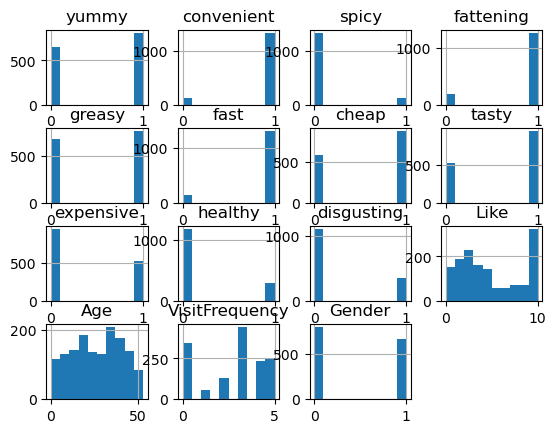

In [22]:
data.hist()

In [27]:
cols=data.columns
x = data.loc[:, cols]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,7,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,29,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,18,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,2,34,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,3,23,0,1


Principal components analysis of the fast food data set

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [34]:
# Perform PCA
pca = PCA(n_components=11)
principal_components = pca.fit_transform(data_scaled)


In [40]:
# Create a DataFrame for the principal components
data_pca = pd.DataFrame(data=principal_components, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"])

In [41]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.991608,-1.111445,0.479535,0.039025,-2.287302,0.688992,0.651472,-0.531916,-0.084722,-0.129661,0.208763
1,-0.997168,0.943356,-0.845057,0.431548,-1.021043,1.354625,0.606344,-0.015006,0.478966,-0.187064,-0.818002
2,-0.334040,0.971290,1.464718,3.421326,-0.285385,1.157358,2.085007,-0.393833,-0.362007,-0.620221,-1.741362
3,-0.191800,-1.001895,-1.093322,0.161527,0.423979,-0.086893,0.999722,0.435166,0.529292,-0.865660,-0.446619
4,-0.176430,-1.141783,-0.092118,0.368037,0.520511,-0.255687,-1.066039,-0.574027,-1.411273,-1.407668,-1.943847
...,...,...,...,...,...,...,...,...,...,...,...
1448,3.763763,1.213495,0.561533,-0.555820,0.758304,-0.791836,-0.178867,1.102466,-2.192169,-0.368502,0.491877
1449,-1.951449,0.284320,0.783988,-1.662735,1.586914,0.901844,0.908574,1.552234,-1.870530,-1.326696,0.530942
1450,-0.821099,1.504991,0.481041,-0.454744,-1.397286,-0.612024,1.393708,-0.060077,0.733611,-0.195484,0.144584
1451,-2.586856,-0.586574,2.127441,0.036749,0.540869,1.198153,-1.942629,-1.150672,-0.184773,0.291802,0.110791


In [42]:
# Print the explained variance ratio
print(f"Explained variance ratio (PC1 + PC2): {sum(pca.explained_variance_ratio_):.2f}")

Explained variance ratio (PC1 + PC2): 0.89


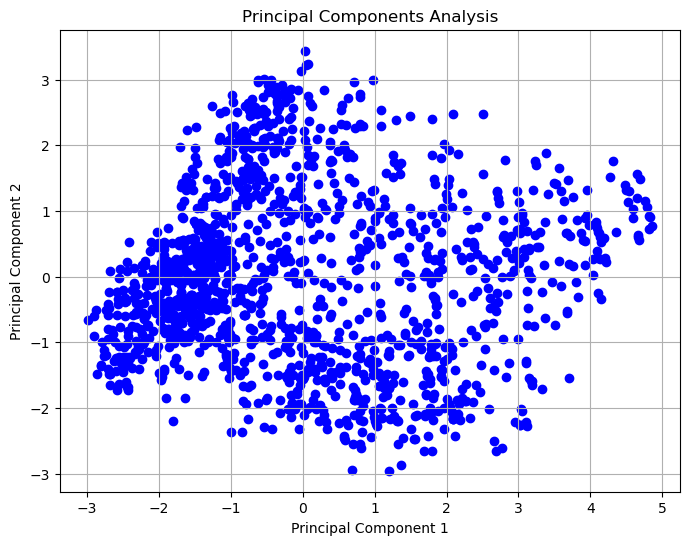

In [43]:
# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(data_pca['PC1'], data_pca['PC2'], c='b', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components Analysis')
plt.grid(True)
plt.show()

In [47]:
std_dev = []
for i in data_pca.columns:
    std_dev.append(np.std(data_pca[i]))
    
print("Standard Deviation")
np.array(std_dev)

Standard Deviation


array([1.78524742, 1.32798548, 1.26253511, 1.05245683, 1.02816016,
       0.99045419, 0.9828687 , 0.91285982, 0.84823575, 0.77714173,
       0.76070513])

In [49]:
pov = pca.explained_variance_ratio_
print("Proportion of Variance")
pov

Proportion of Variance


array([0.21247389, 0.1175697 , 0.10626633, 0.07384436, 0.07047422,
       0.06539997, 0.06440206, 0.0555542 , 0.04796693, 0.04026328,
       0.03857815])

In [50]:
cp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Proportion")
cp

Cumulative Proportion


array([0.21247389, 0.33004359, 0.43630991, 0.51015427, 0.58062849,
       0.64602846, 0.71043052, 0.76598472, 0.81395165, 0.85421493,
       0.89279309])

In [53]:
components = pca.components_
num_pc = pca.n_features_
pc_name = ["PC"+str(i) for i in range(1, num_pc+1)]
loadings_df = pd.DataFrame

implement Clustering Algorithm
K-Means Clustering Algorithm

In [54]:
#clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering



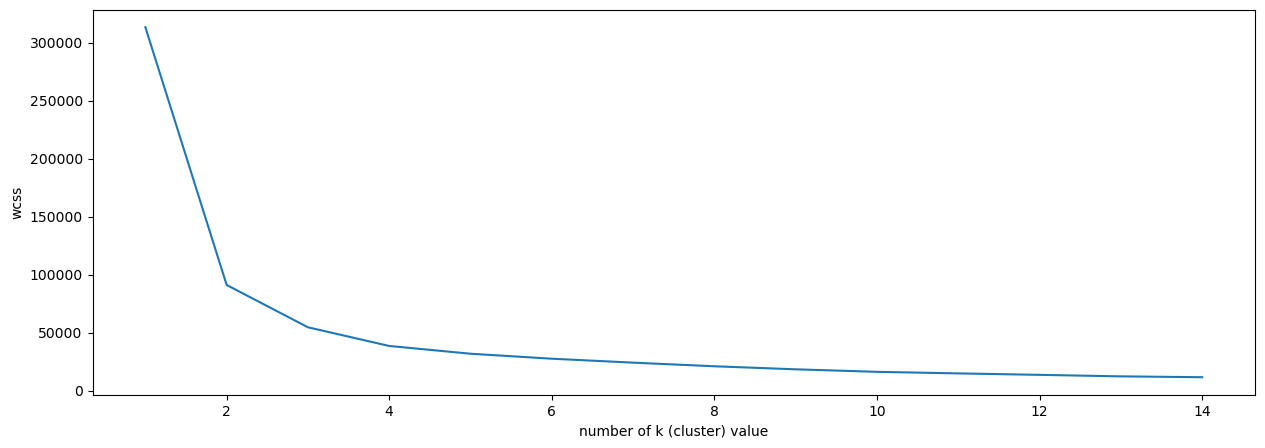

In [55]:
#define k value
wcss = []
data_model = data.drop(['Gender','VisitFrequency'],axis=1)
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [56]:
#K-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(x)
#adding to df
data['cluster_num'] = kmeans.labels_ 
#Label assigned for each data point
print (kmeans.labels_)
print (kmeans.inertia_) 
print(kmeans.n_iter_)
#For the location of the centroids on each cluster
print(kmeans.cluster_centers_)  

[0 3 0 ... 3 2 1]
43413.98866934376
9
[[ 0.40895522  0.87164179  0.17014925  0.81492537  0.42686567  0.91044776
   0.65373134  0.54626866  0.26567164  0.20895522  0.22985075  5.17313433
  44.92835821  2.58208955  0.45373134]
 [ 0.78693182  0.94034091  0.04829545  0.93181818  0.72159091  0.9375
   0.63068182  0.8125      0.35511364  0.17613636  0.19318182  3.3125
   7.59659091  2.67613636  0.47159091]
 [ 0.59580052  0.90813648  0.06824147  0.87664042  0.51706037  0.86351706
   0.52493438  0.65091864  0.43569554  0.21784777  0.26771654  4.58267717
  20.64041995  2.75065617  0.47769029]
 [ 0.42077922  0.90909091  0.09350649  0.84415584  0.44415584  0.89350649
   0.59480519  0.56883117  0.36363636  0.19220779  0.27532468  4.76103896
  33.94285714  2.54025974  0.42857143]]


In [57]:
from collections import Counter
Counter(kmeans.labels_)

#correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.411622,0.297475,-0.037623,-0.010481,0.152882,0.082514,0.038833,0.071002,0.209057,-0.078392,0.245985
convenient,-0.289078,0.008634,-0.162996,0.238875,-0.340739,-0.204022,0.029085,-0.158715,-0.720887,0.111864,0.144273
spicy,-0.005569,-0.030052,0.154911,0.784613,0.241187,-0.024617,0.260551,0.265104,0.060703,0.250184,0.066224
fattening,0.135736,0.124515,-0.541141,0.122432,-0.213060,-0.034510,0.178140,0.207549,0.013607,-0.639423,0.164833
greasy,0.221607,0.167253,-0.428474,0.229630,0.307339,0.159096,-0.000731,-0.035592,-0.177986,0.069387,-0.454924
fast,-0.180934,-0.195095,-0.246844,0.272356,-0.192112,-0.300916,-0.048353,-0.635063,0.486122,0.043789,-0.124896
cheap,-0.232009,-0.517878,-0.257836,0.019999,0.242252,0.118205,-0.167504,0.141040,-0.001798,-0.091210,0.037292
tasty,-0.421013,0.241290,-0.029827,0.079571,0.099531,0.034597,0.044740,0.132739,0.230401,-0.086613,0.243169
expensive,0.230919,0.549525,0.203693,0.089238,-0.111045,-0.123907,0.163667,-0.213894,0.055524,-0.076193,-0.027836


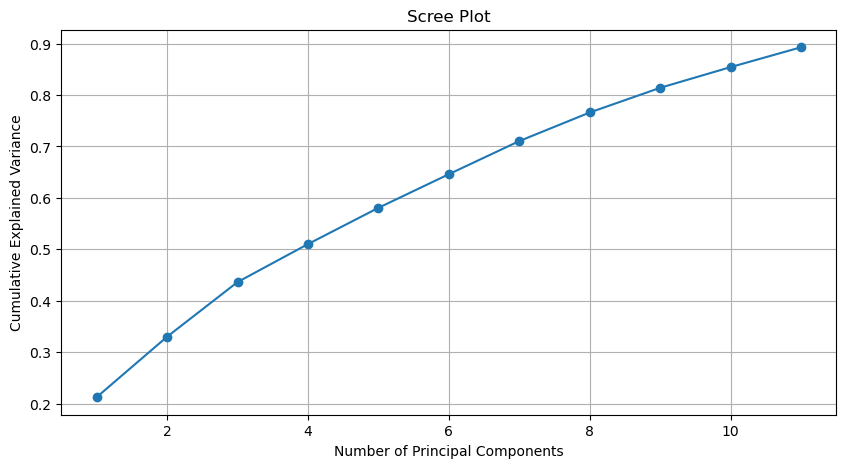

In [62]:
# Plot the scree plot
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [66]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [67]:
pca = PCA()
pca.fit(x_scaled)

PCA()

In [68]:
pca_scores = pca.transform(x_scaled)

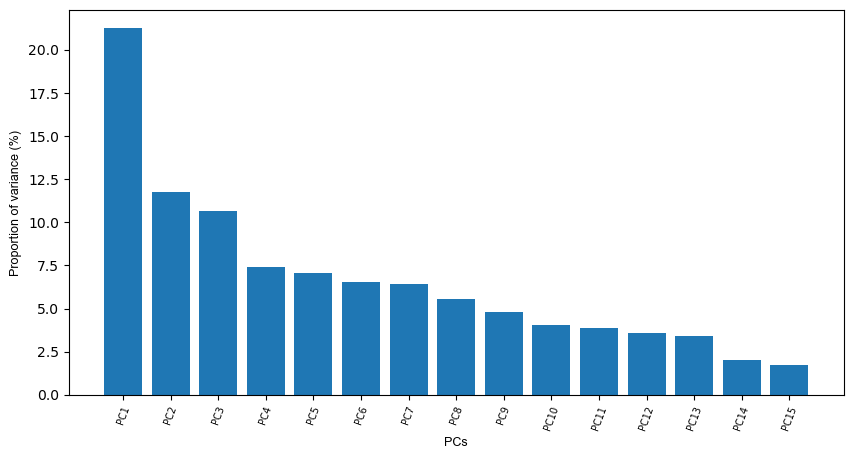

In [71]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))# get PC scores
pca_scores = PCA().fit_transform(x)


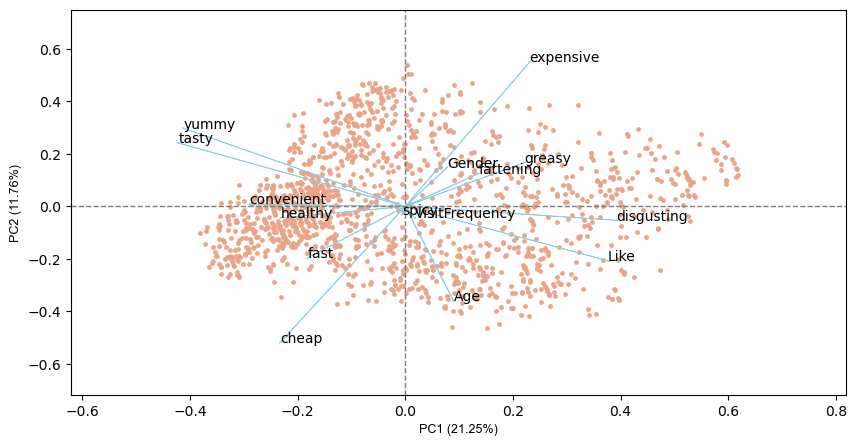

In [70]:
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=data.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

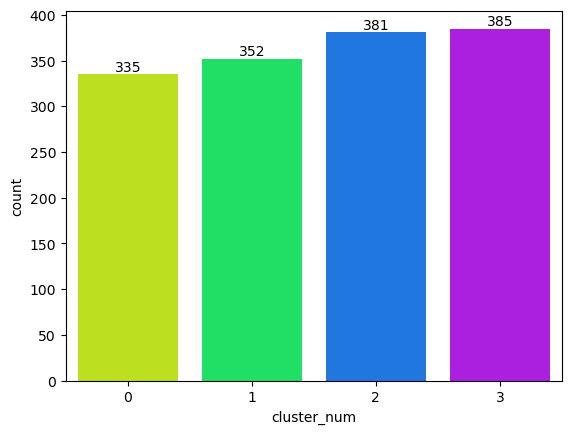

In [73]:
f = sns.countplot(x=data["cluster_num"], palette='hsv')
f.bar_label(f.containers[0])
plt.rcParams['figure.figsize'] = (25, 8)
# print(len(data['cluster_num'][1]))

In [103]:
data1=pd.get_dummies(data, prefix=['cluster_num'], columns=['cluster_num'])
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num_0,cluster_num_1,cluster_num_2,cluster_num_3
0,0,1,0,1,0,1,1,0,1,0,0,7,43,0,0,True,False,False,False
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0,False,False,False,True
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0,True,False,False,False
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0,True,False,False,False
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,9,29,5,1,False,False,False,True
1449,1,1,0,1,0,0,1,1,0,1,0,1,18,4,0,False,False,True,False
1450,1,1,0,1,0,1,0,1,1,0,0,2,34,3,0,False,False,False,True
1451,1,1,0,0,0,1,1,1,0,1,0,3,23,0,1,False,False,True,False


In [126]:
for i in cols:
    Gender = data.groupby(['cluster_num'])[i].mean()
    Gender = Gender.to_frame().reset_index()
    result.append(Gender)

In [127]:
for i in range(len(result)):
    print(pd.DataFrame(result[i]))

   cluster_num     yummy
0            0  0.408955
1            1  0.786932
2            2  0.595801
3            3  0.420779
   cluster_num  convenient
0            0    0.871642
1            1    0.940341
2            2    0.908136
3            3    0.909091
   cluster_num     spicy
0            0  0.170149
1            1  0.048295
2            2  0.068241
3            3  0.093506
   cluster_num  fattening
0            0   0.814925
1            1   0.931818
2            2   0.876640
3            3   0.844156
   cluster_num    greasy
0            0  0.426866
1            1  0.721591
2            2  0.517060
3            3  0.444156
   cluster_num      fast
0            0  0.910448
1            1  0.937500
2            2  0.863517
3            3  0.893506
   cluster_num     cheap
0            0  0.653731
1            1  0.630682
2            2  0.524934
3            3  0.594805
   cluster_num     tasty
0            0  0.546269
1            1  0.812500
2            2  0.650919
3         

In [125]:
data1=pd.get_dummies(data, prefix=['VisitFrequency'], columns=['VisitFrequency'])
data1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,...,Like,Age,Gender,cluster_num,VisitFrequency_0,VisitFrequency_1,VisitFrequency_2,VisitFrequency_3,VisitFrequency_4,VisitFrequency_5
0,0,1,0,1,0,1,1,0,1,0,...,7,43,0,0,True,False,False,False,False,False
1,1,1,0,1,1,1,1,1,1,0,...,1,33,0,3,True,False,False,False,False,False
2,0,1,1,1,1,1,0,1,1,1,...,0,44,0,0,True,False,False,False,False,False
3,1,1,0,1,1,1,1,1,0,0,...,3,51,0,0,False,False,False,False,True,False
4,0,1,0,1,1,1,1,0,0,1,...,1,31,1,3,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,...,9,29,1,3,False,False,False,False,False,True
1449,1,1,0,1,0,0,1,1,0,1,...,1,18,0,2,False,False,False,False,True,False
1450,1,1,0,1,0,1,0,1,1,0,...,2,34,0,3,False,False,False,True,False,False
1451,1,1,0,0,0,1,1,1,0,1,...,3,23,1,2,True,False,False,False,False,False


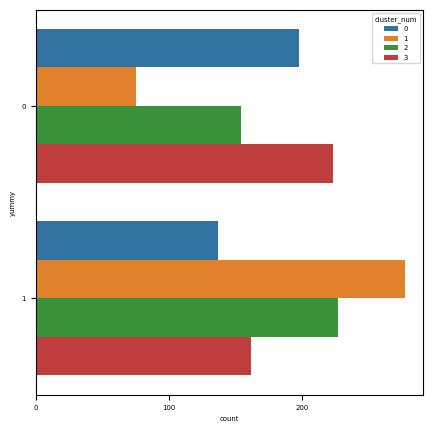

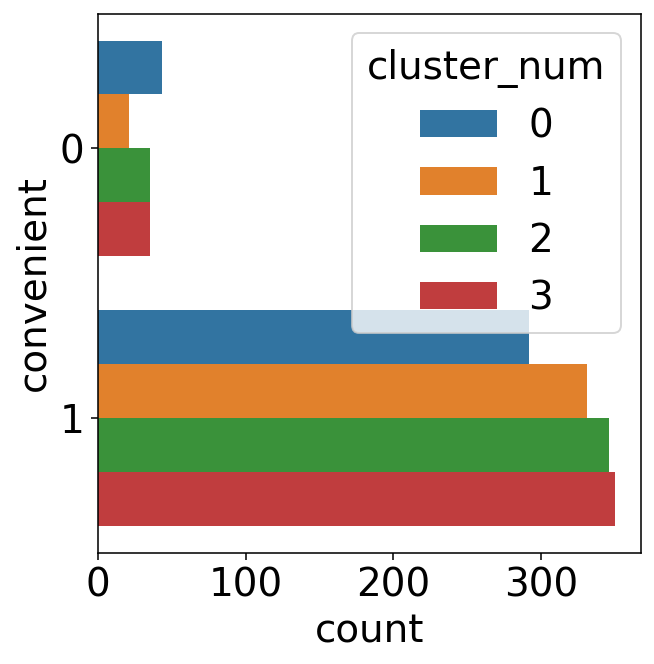

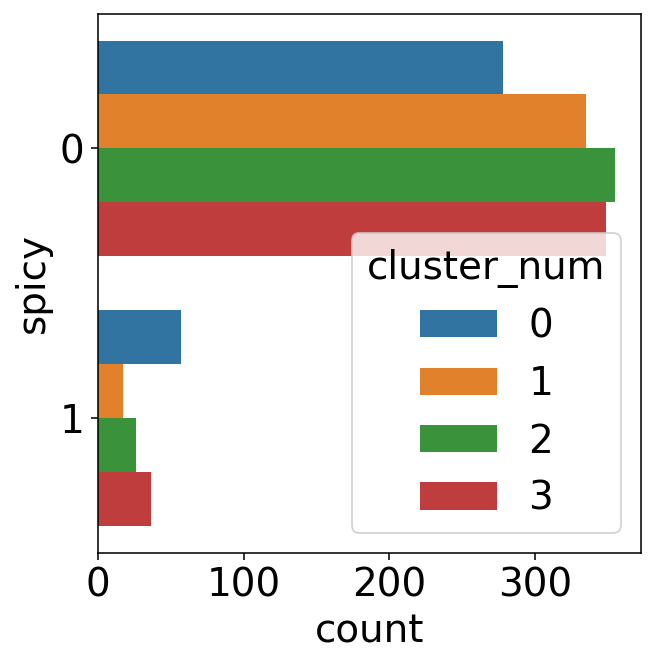

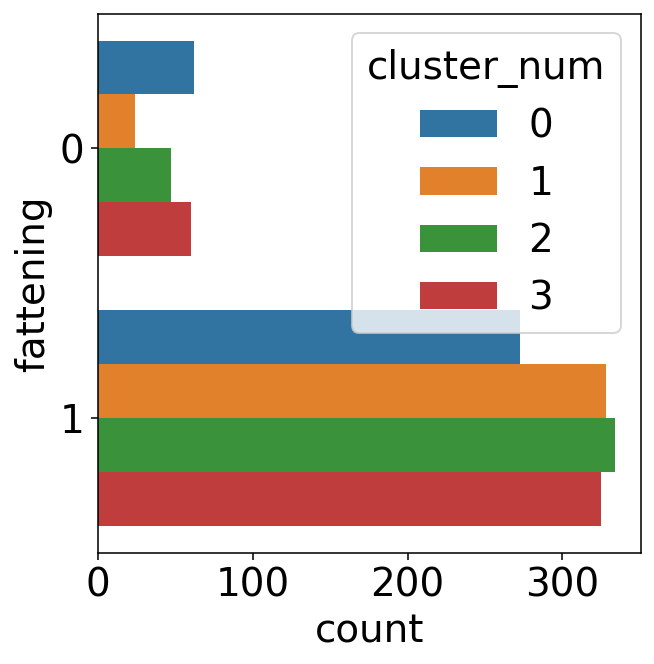

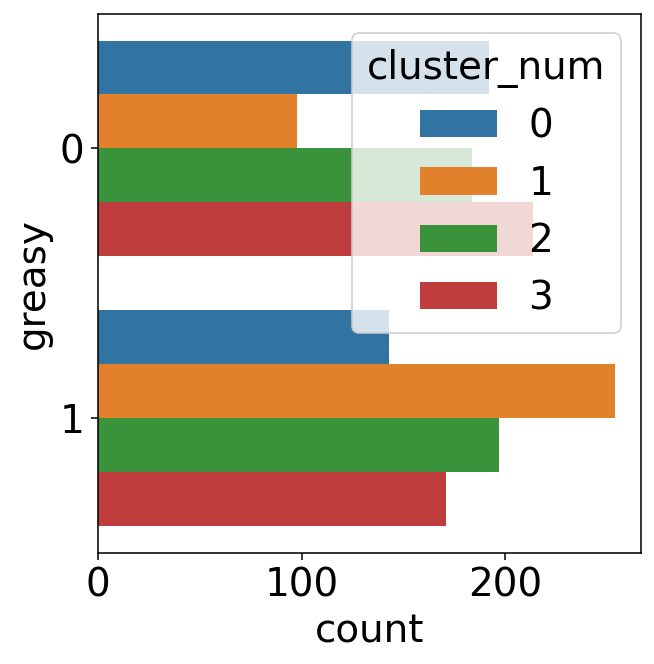

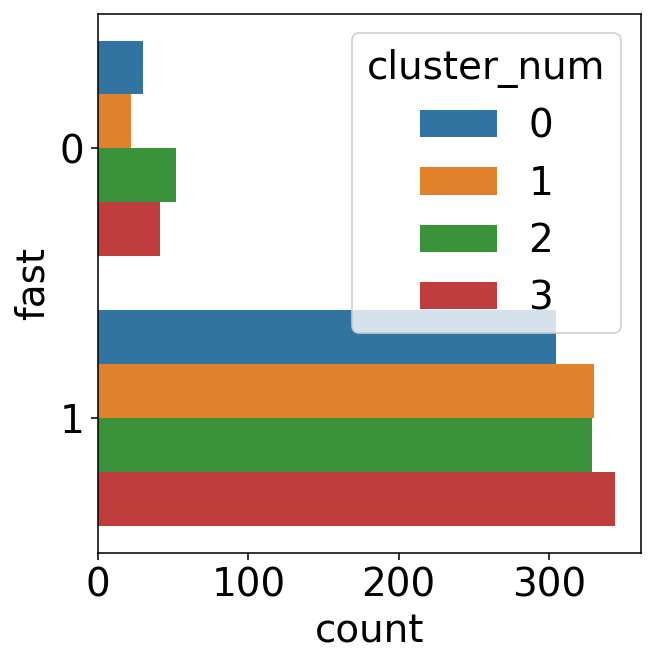

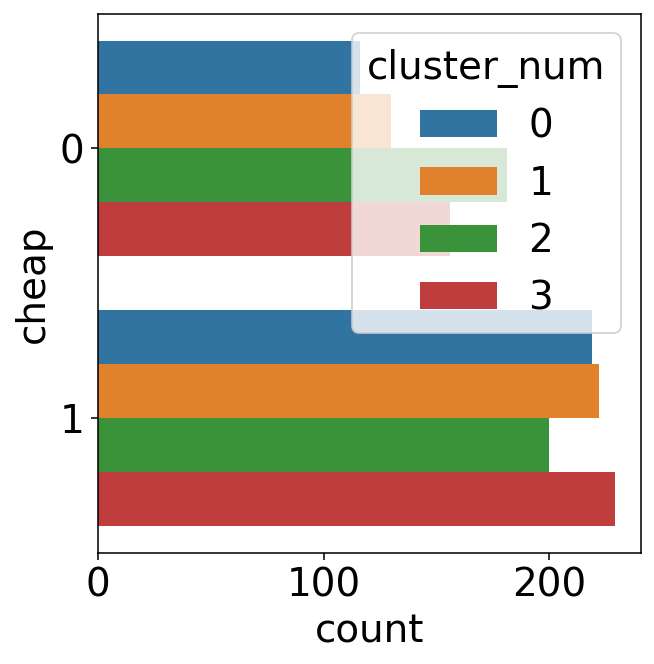

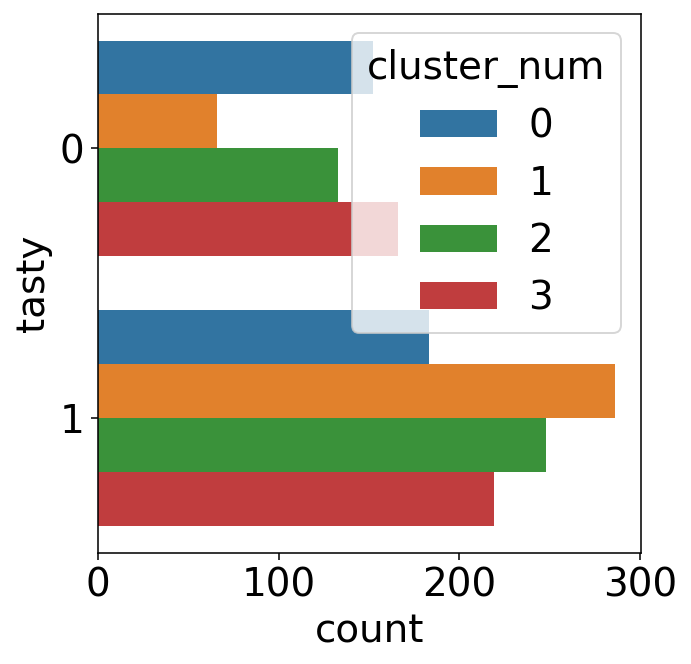

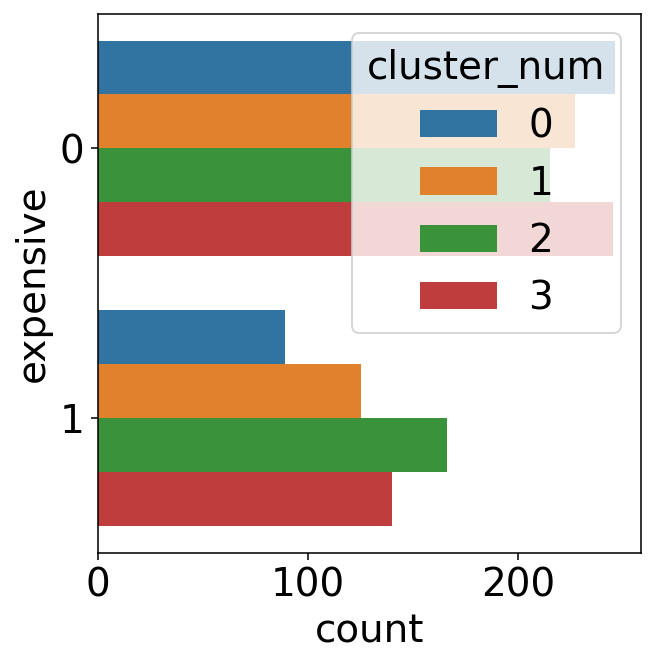

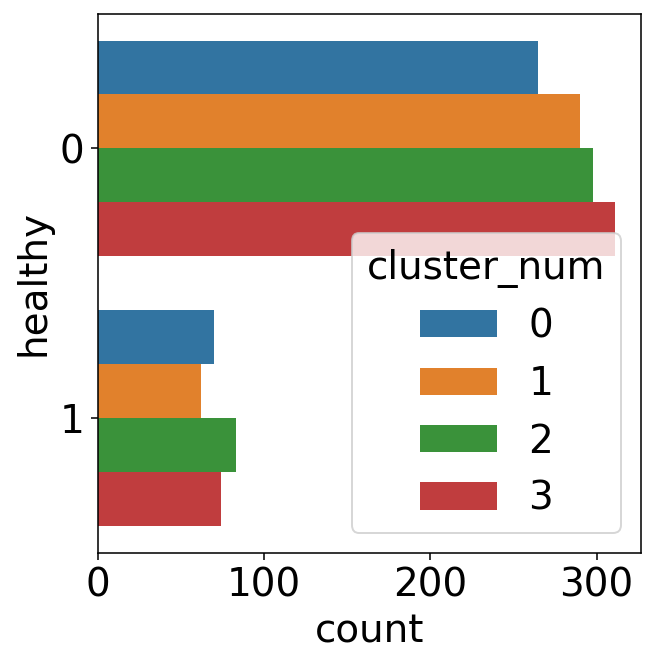

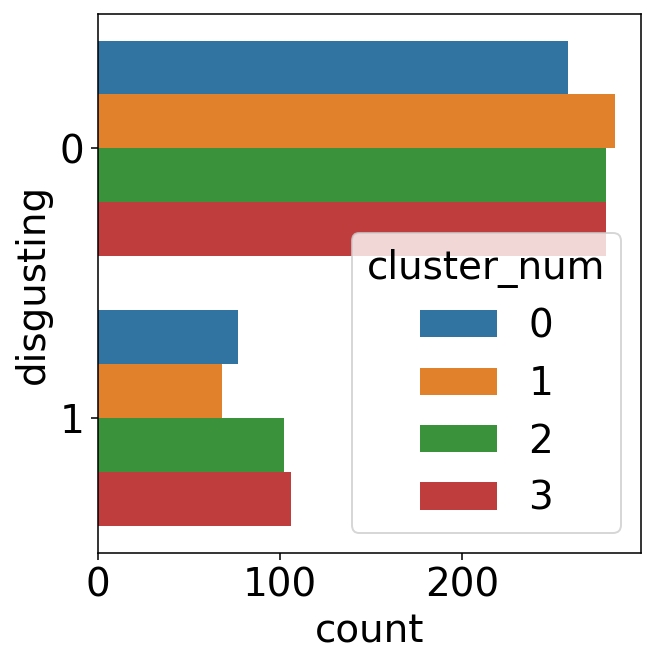

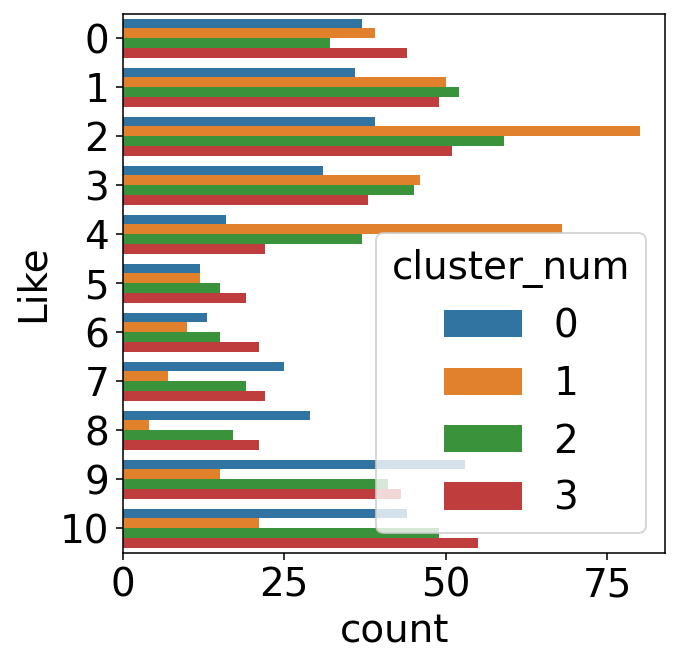

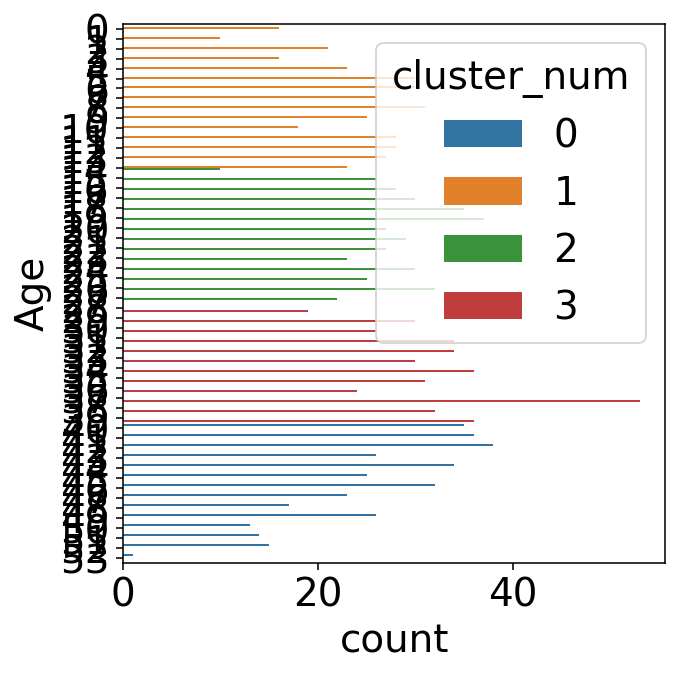

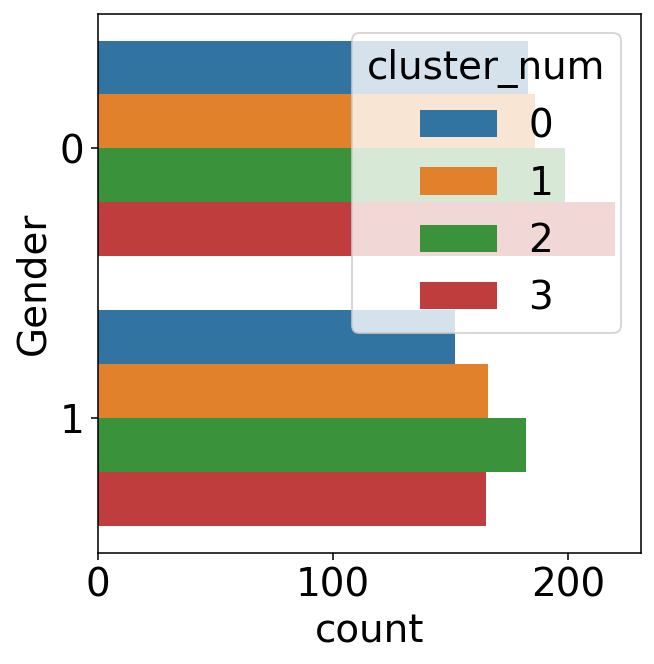

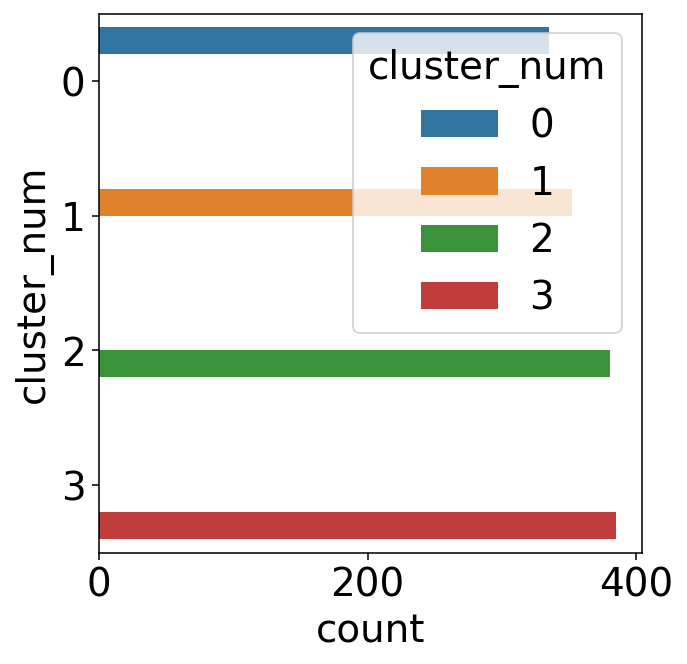

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [137]:
for i in data1.columns:
    sns.countplot(y=data1[i], hue=data1['cluster_num'], data=data1)
#     plt.rcParams['figure.figsize'] = (25, 8)
    plt.rcParams['figure.dpi'] = 140
    plt.rcParams['font.size'] = 20
    plt.show()

# for i in ['cluster_num_0', 'cluster_num_1', 'cluster_num_2', 'cluster_num_3']:
#     for j in cols:
#         sns.countplot(x=dataset1[i], hue=dataset1[j])
#         plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

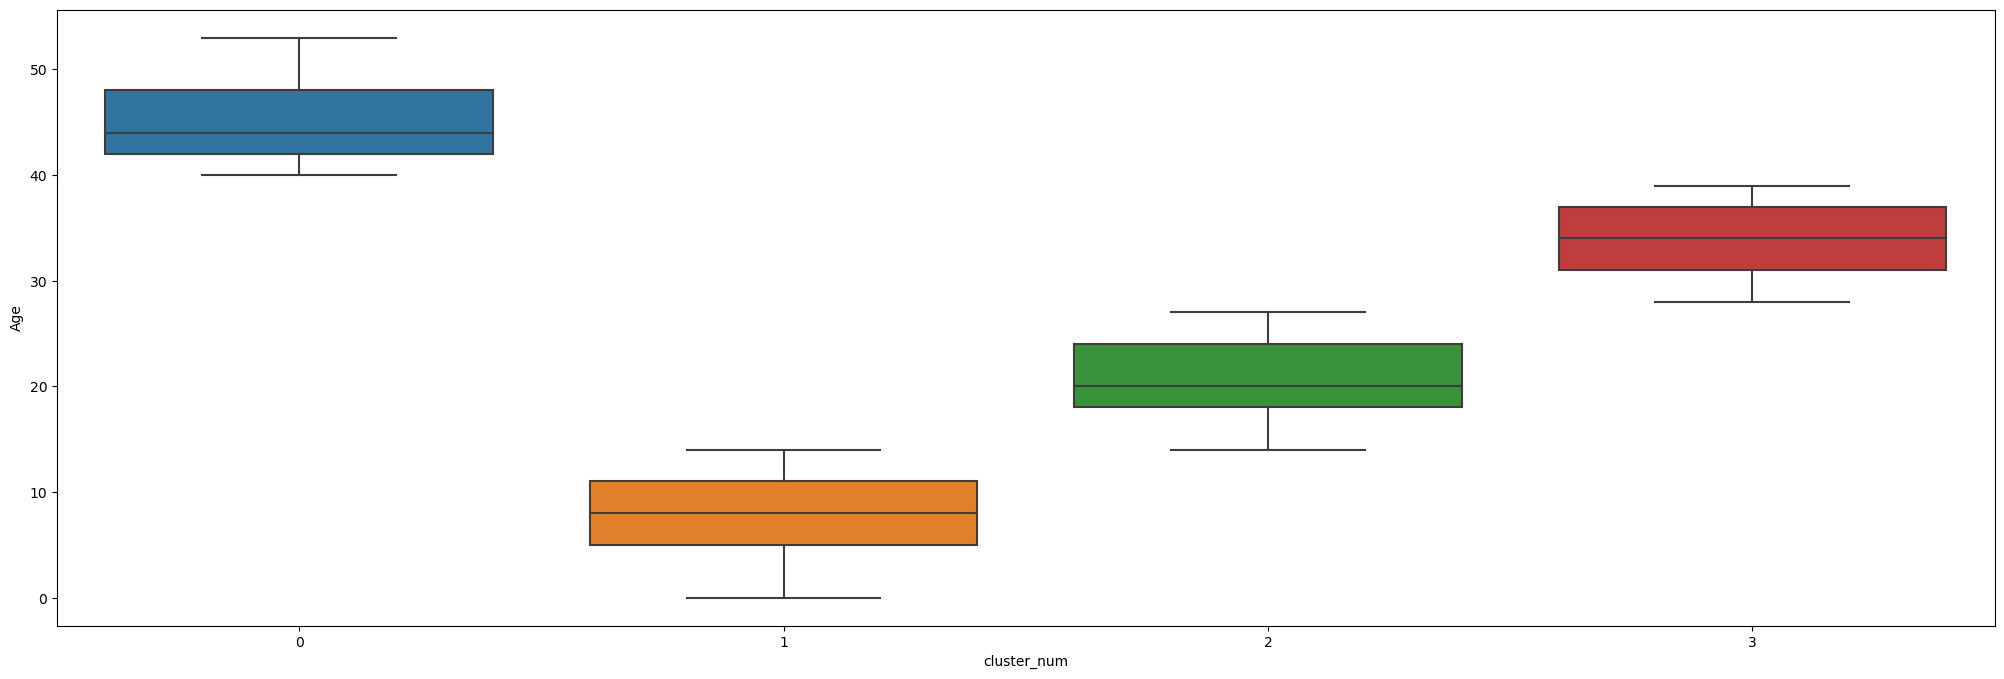

In [113]:
sns.boxplot(x='cluster_num', y='Age', data=data1)

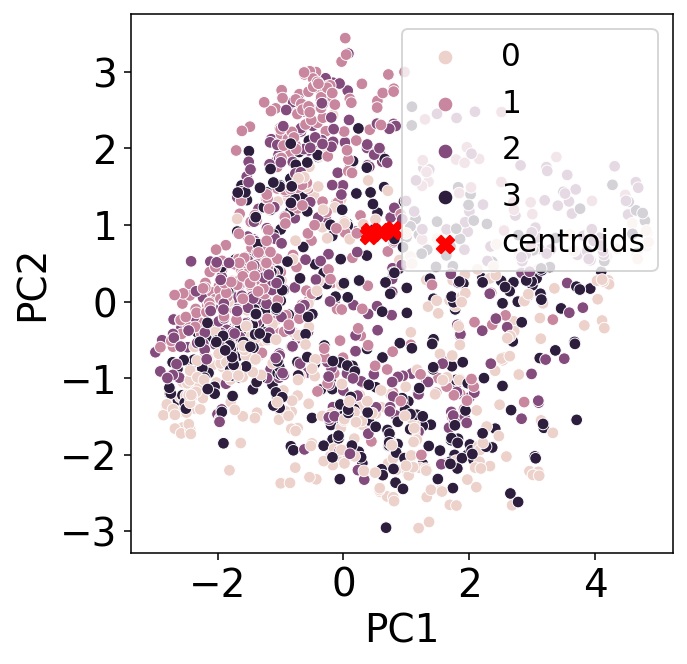

In [140]:
sns.scatterplot(data=data_pca, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 16
plt.legend()
plt.show()

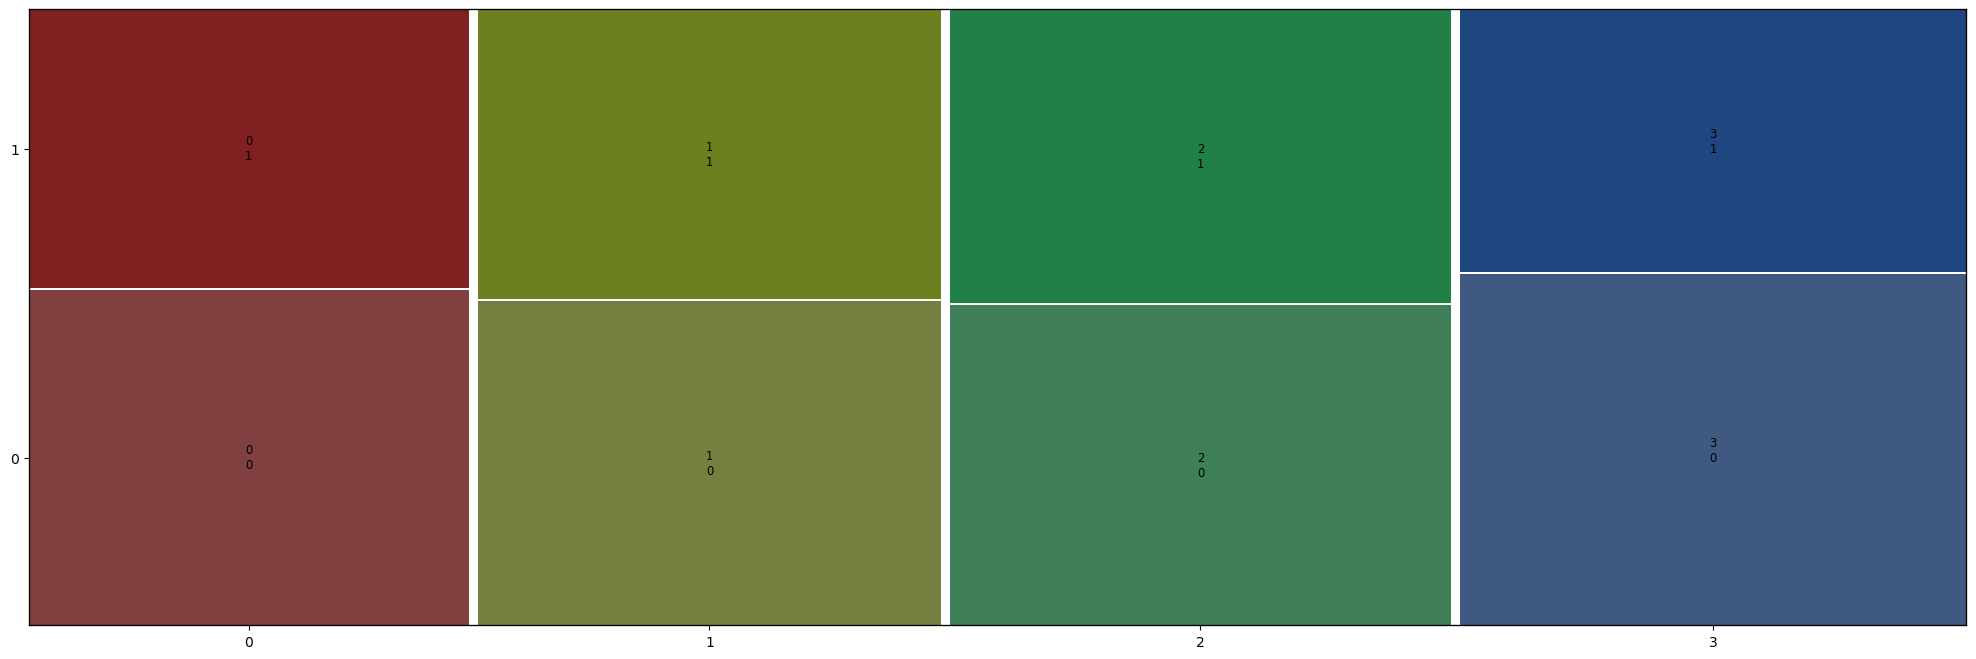

In [116]:
mosaic(crosstab.stack())
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.size'] = 5
plt.show()

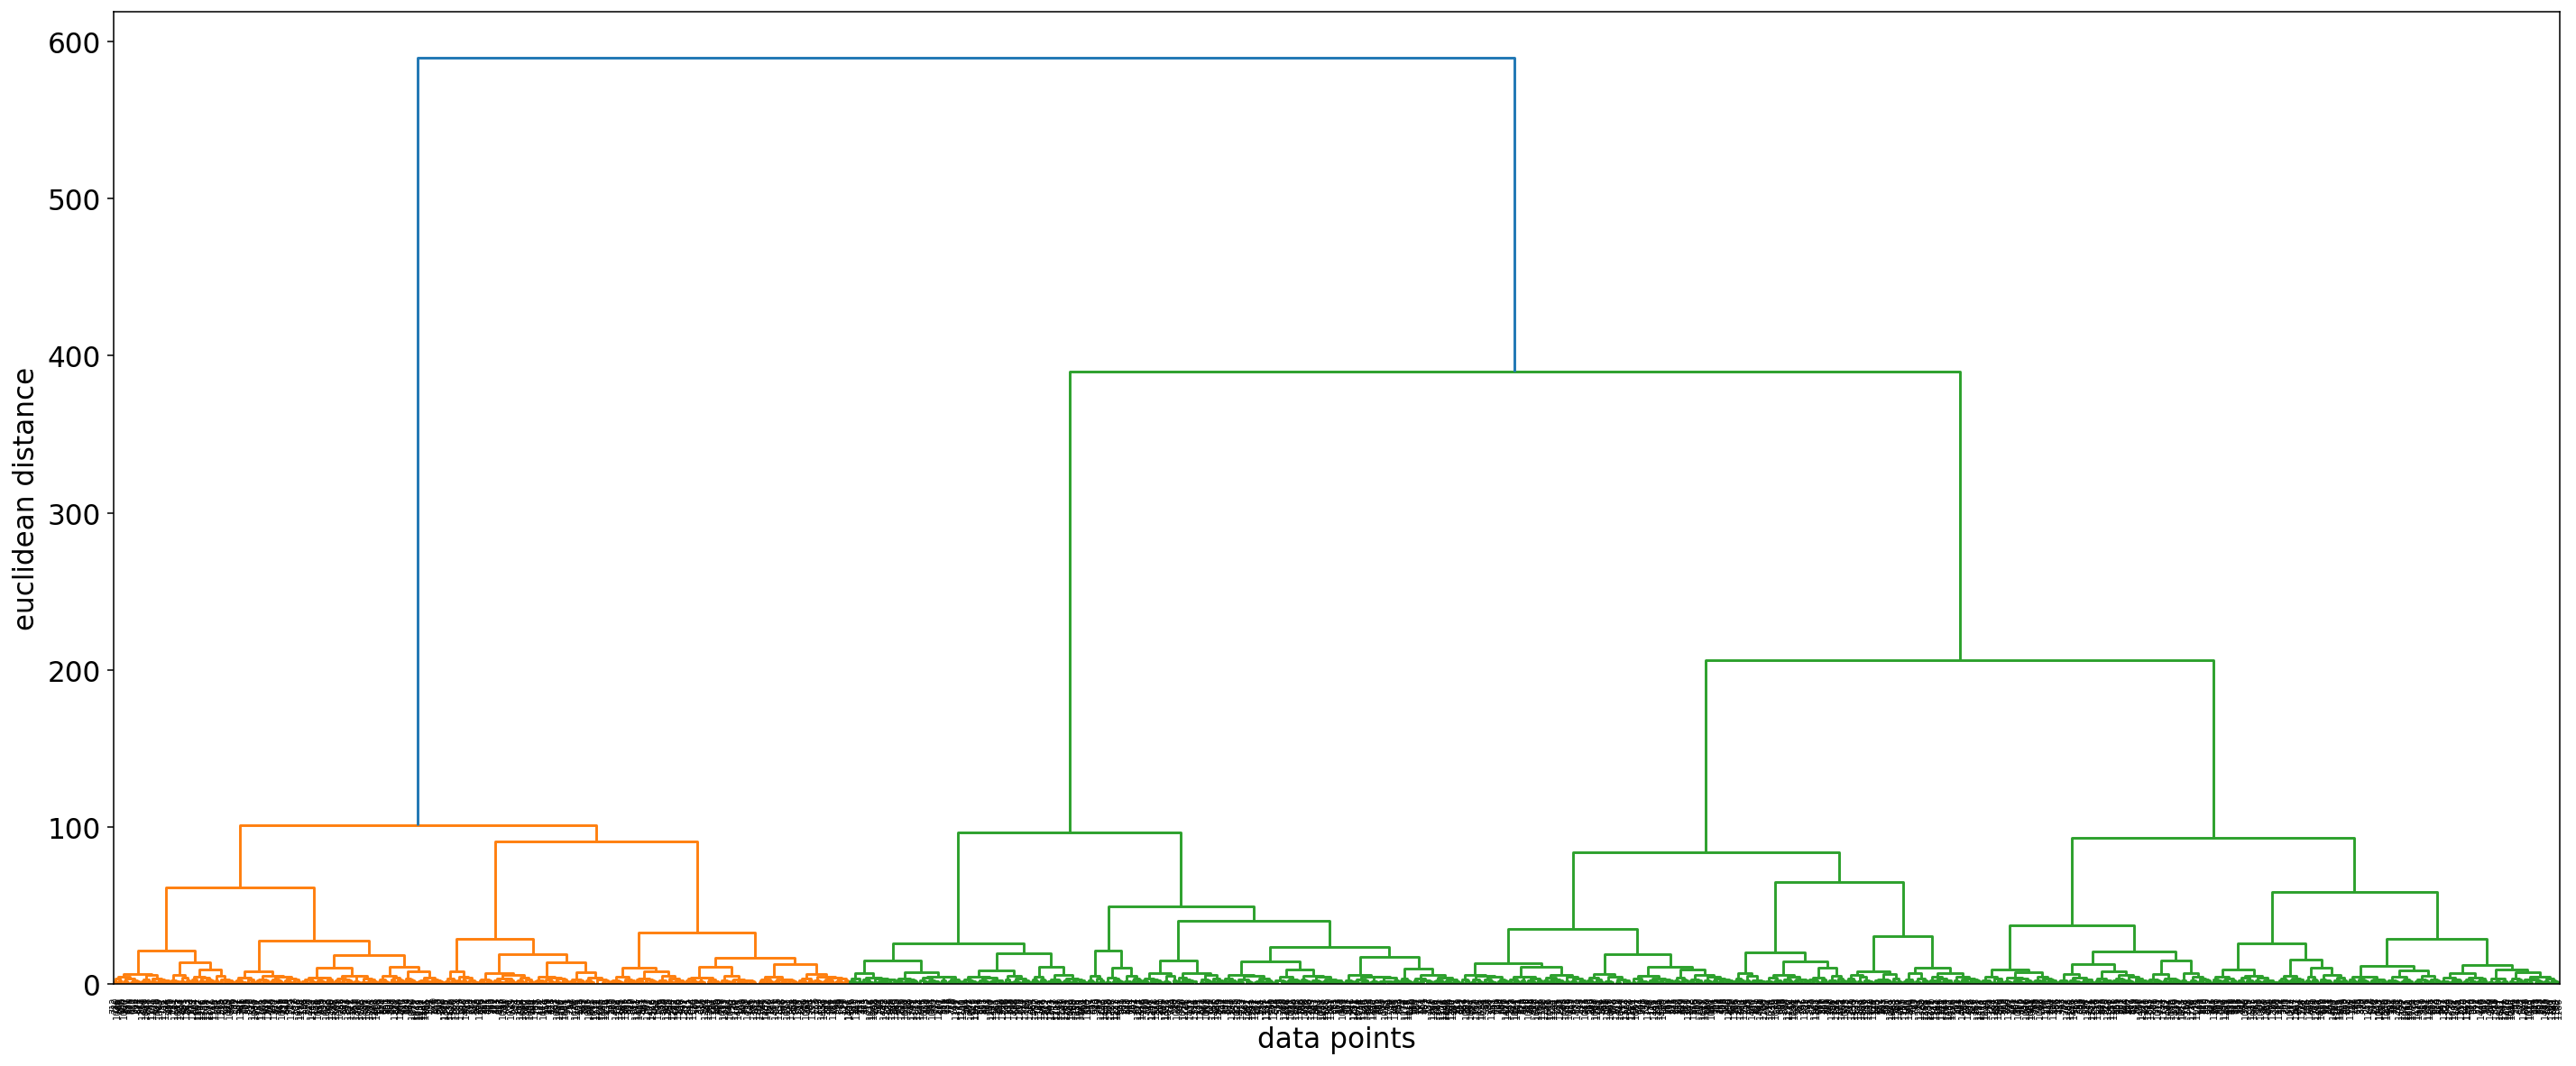

In [143]:
#create demogram and find the best clustering value
merg = linkage(data_model,method="ward")
plt.figure(figsize=(25,10))
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()